In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import numpy as np
import torch

from dagmm.train import TrainerDAGMM
from dagmm.test import eval
from preprocess import get_ALeRCE_data

In [3]:
class Args:
    batch_size = 128
    num_epochs = 200
    n_gmm = 3
    lr = 1e-4
    lambda_energy = 0.1
    lambda_cov = 0.005
    latent_dim = 1
    

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training

dataloader_train, scaler, classes = get_ALeRCE_data(args.batch_size, 'train', mode='train')
dataloader_test, _, _ = get_ALeRCE_data(args.batch_size, 'test', mode='test', scaler=scaler)

dagmm = TrainerDAGMM(args, dataloader_train, device)
dagmm.train()

  128/27058: [>...............................] - ETA 0.0s

/home/ec2-user/ALeRCE-detector-per/dagmm/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


27058/27058: [===============================>] - ETA 1.2sss
Training DAGMM... Epoch: 0, Loss: 18.373
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 18.485
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 18.402
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 18.570
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 4, Loss: 18.131
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 18.254
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 18.129
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 7, Loss: 18.562
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 8, Loss: 18.535
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 9, Loss: 18.42

27058/27058: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 81, Loss: 18.459
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 82, Loss: 18.704
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 83, Loss: 18.746
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 84, Loss: 18.494
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 85, Loss: 18.131
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 86, Loss: 18.345
27058/27058: [===============================>] - ETA 0.0ss
Training DAGMM... Epoch: 87, Loss: 18.245
27058/27058: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 88, Loss: 18.554
27058/27058: [===============================>] - ETA 0.1ss
Training DAGMM... Epoch: 89, Loss: 18.508
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 90,

27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 161, Loss: 18.558
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 162, Loss: 18.575
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 163, Loss: 18.373
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 164, Loss: 18.560
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 165, Loss: 18.086
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 166, Loss: 18.193
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 167, Loss: 18.309
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 168, Loss: 18.489
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 169, Loss: 18.273
27058/27058: [===============================>] - ETA 0.0s
Training DAGMM... Epoch

In [4]:
labels1, labels2, scores, latent = eval(dagmm.model, (dataloader_train, dataloader_test), device, args.n_gmm)

Testing...


/home/ec2-user/ALeRCE-detector-per/dagmm/forward_step.py:79: UserWarning: torch.potrf is deprecated in favour of torch.cholesky and will be removed in the next release. Please use torch.cholesky instead and note that the :attr:`upper` argument in torch.cholesky defaults to ``False``.
  l = torch.potrf(a, False)


Precision : 0.0000, Recall : 0.0000, F-score : 0.0000
ROC AUC score: 50.90


In [5]:
scores_in = scores[labels1==0]
scores_out = scores[labels1==1]

scores_ELL = scores[labels2==1]

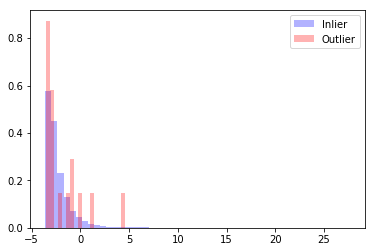

In [6]:
plt.hist(scores_in, bins=50, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()